In [10]:
import pandas as pd
import numpy as np
import psycopg2
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline
sns.set_style('darkgrid')

## Determine Financial Rotation Age

In [12]:
conn = psycopg2.connect("dbname='Rotations' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT econsummary.*, cases.mgmtid, CAST (cases.standid AS INT) AS siteindex
FROM econsummary, cases
WHERE econsummary.caseid = cases.caseid AND cases.mgmtid = 'SHRT';
'''
short = pd.read_sql(SQL, conn)

# close the database connection
conn.close()

In [13]:
short['siteclass'] = pd.cut(short.siteindex, bins=[0,75,95,115,135,161], 
                           labels=[5, 4, 3, 2, 1], right=False).astype('int')
short = short.sort_values(by=['caseid', 'year'])
pnv_smooth = short.groupby('caseid').rolling(window=5, on='year').mean().reset_index(drop=True)[['caseid', 'year', 'pnv']]
short = short.merge(pnv_smooth, how='left', on=['caseid', 'year'], suffixes=('','_smooth'))


In [14]:
short.columns

Index(['caseid', 'standid', 'year', 'period', 'pretend_harvest',
       'undiscounted_cost', 'undiscounted_revenue', 'discounted_cost',
       'discounted_revenue', 'pnv', 'irr', 'bc_ratio', 'rrr', 'sev',
       'value_of_forest', 'value_of_trees', 'mrch_cubic_volume',
       'mrch_boardfoot_volume', 'discount_rate', 'given_sev', 'mgmtid',
       'siteindex', 'siteclass', 'pnv_smooth'],
      dtype='object')

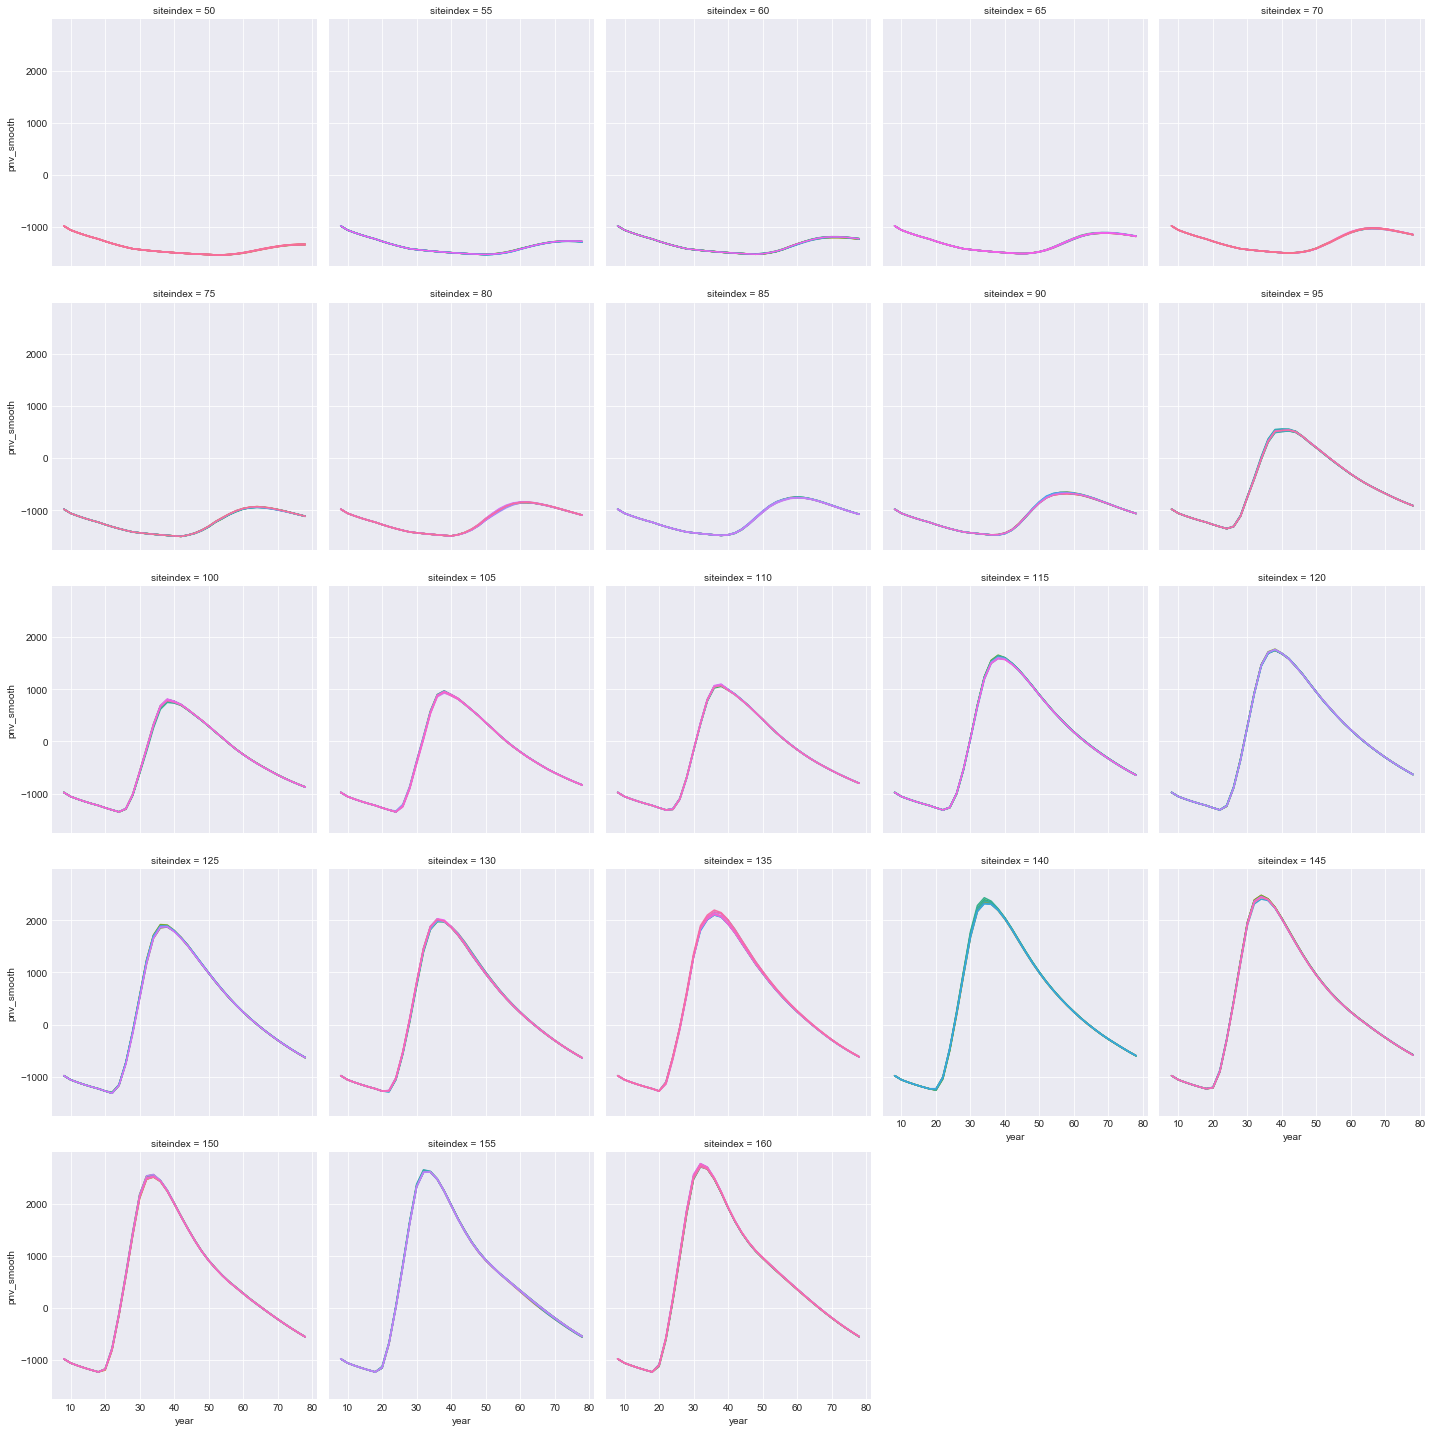

In [15]:
g = sns.FacetGrid(data=short, col='siteindex', hue='caseid', 
                  col_wrap=5, size=4)
g = g.map(plt.plot, 'year', 'pnv_smooth');

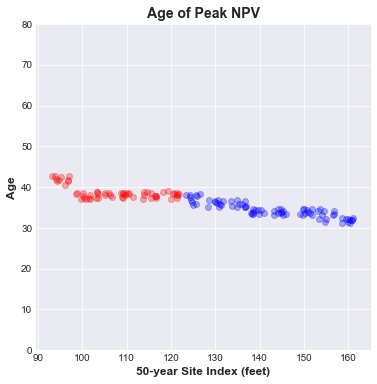

In [16]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# we only want to know peak NPV if it is positive, lower site classes have negative NPV
positive = short.loc[short.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'red', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)

plt.ylim(0,80)
#plt.xlim(40,170)
plt.title('Age of Peak NPV', fontsize=14, weight='bold')
plt.xlabel("50-year Site Index (feet)", fontsize=12, weight='bold')
plt.ylabel("Age", fontsize=12, weight='bold');

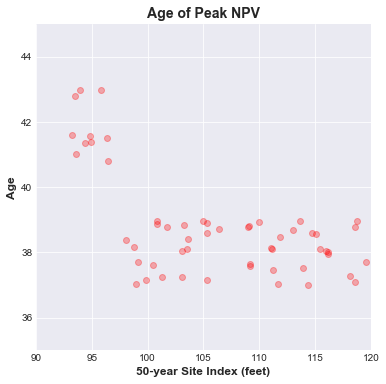

In [17]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# we only want to know peak NPV if it is positive, lower site classes have negative NPV
positive = short.loc[short.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'red', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)

plt.ylim(35,45)
plt.xlim(90,120)
plt.title('Age of Peak NPV', fontsize=14, weight='bold')
plt.xlabel("50-year Site Index (feet)", fontsize=12, weight='bold')
plt.ylabel("Age", fontsize=12, weight='bold');

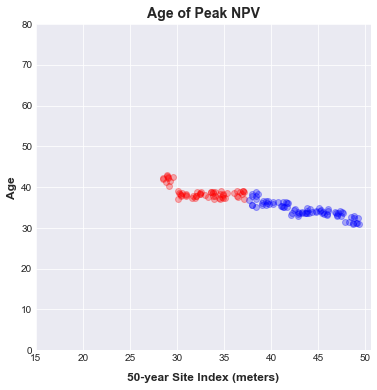

In [18]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# we only want to know peak NPV if it is positive, lower site classes have negative NPV
positive = short.loc[short.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'red', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)

plt.ylim(0,80)
#plt.xlim(40,170)
plt.title('Age of Peak NPV', fontsize=14, weight='bold')
plt.xlabel("50-year Site Index (meters)", fontsize=12, weight='bold', labelpad=10)
plt.ylabel("Age", fontsize=12, weight='bold')

xticks_m = np.arange(15,55,5)
ax.set_xticks(xticks_m/0.3048)
ax.set_xticklabels(xticks_m);

## Determine Financial Rotation Age for Steep Slopes

In [19]:
conn = psycopg2.connect("dbname='Rotations' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT econsummary.*, cases.mgmtid, CAST (cases.standid AS INT) AS siteindex
FROM econsummary, cases
WHERE econsummary.caseid = cases.caseid AND cases.mgmtid = 'SHST';
'''
steep = pd.read_sql(SQL, conn)

# close the database connection
conn.close()

In [20]:
steep['siteclass'] = pd.cut(steep.siteindex, bins=[0,75,95,115,135,161], 
                           labels=[5, 4, 3, 2, 1], right=False).astype('int')
steep = steep.sort_values(by=['caseid', 'year'])
pnv_smooth = steep.groupby('caseid').rolling(window=5, on='year').mean().reset_index(drop=True)[['caseid', 'year', 'pnv']]
steep = steep.merge(pnv_smooth, how='left', on=['caseid', 'year'], suffixes=('','_smooth'))

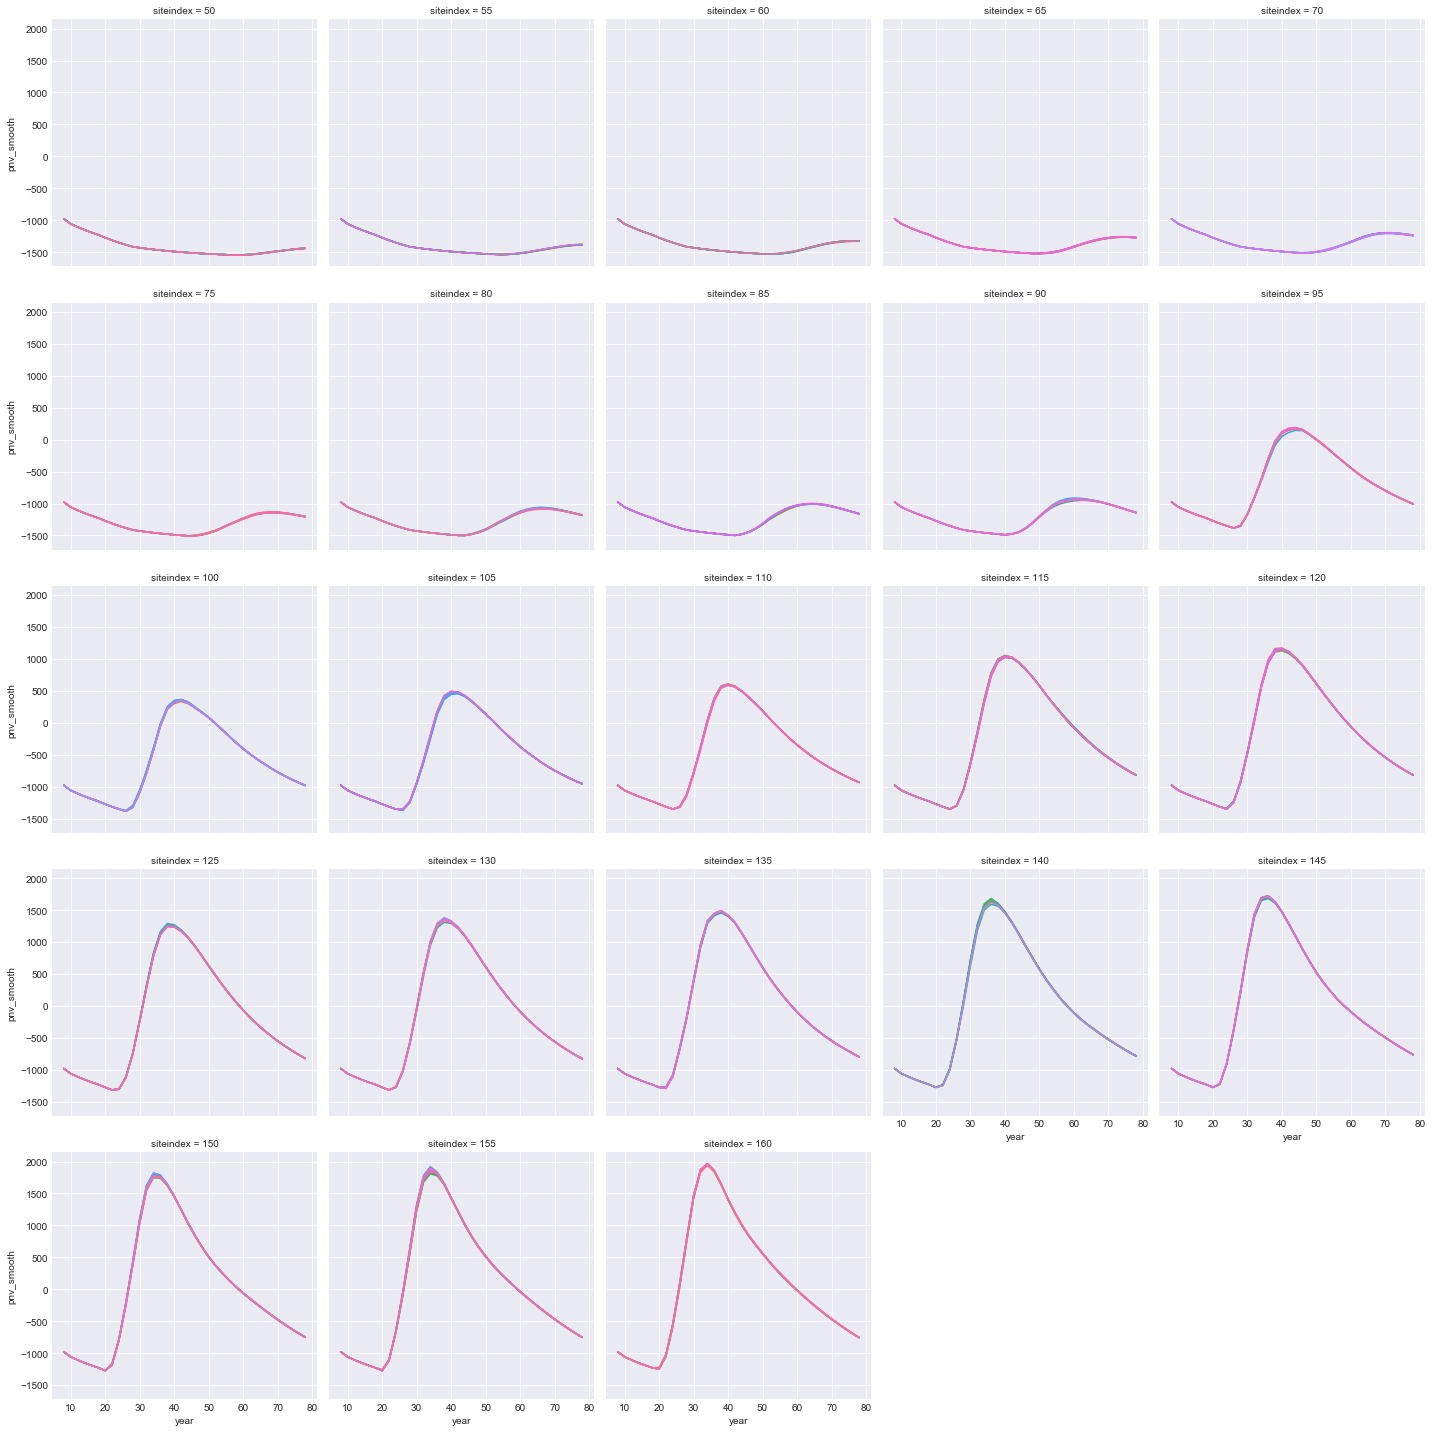

In [21]:
g = sns.FacetGrid(data=steep, col='siteindex', hue='caseid', 
                  col_wrap=5, size=4)
g = g.map(plt.plot, 'year', 'pnv_smooth');

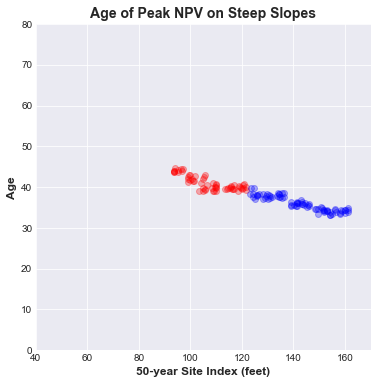

In [22]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# we only want to know peak NPV if it is positive, lower site classes have negative NPV
positive = steep.loc[steep.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'red', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=2, y_jitter=1, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax)

plt.ylim(0,80)
plt.xlim(40,170)
plt.title('Age of Peak NPV on Steep Slopes', fontsize=14, weight='bold')
plt.xlabel("50-year Site Index (feet)", fontsize=12, weight='bold')
plt.ylabel("Age", fontsize=12, weight='bold');

## Compare financially optimal rotation age for flat and steep slopes

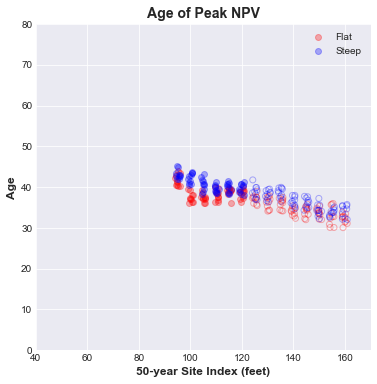

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# FOR FLAT SLOPES
positive = short.loc[short.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3}, ax=ax, label='Flat')
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=ax)

# FOR STEEP SLOPES
positive = steep.loc[steep.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax, label='Steep')
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=ax)


plt.legend()
plt.ylim(0,80)
plt.xlim(40,170)
plt.title('Age of Peak NPV', fontsize=14, weight='bold')
plt.xlabel("50-year Site Index (feet)", fontsize=12, weight='bold')
plt.ylabel("Age", fontsize=12, weight='bold');

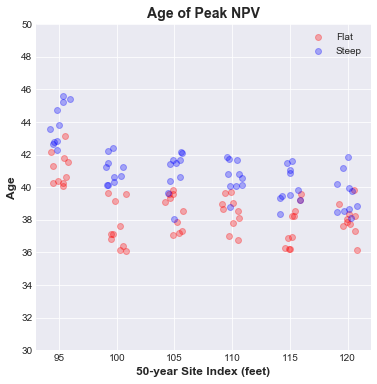

In [24]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# FOR FLAT SLOPES
positive = short.loc[short.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3}, ax=ax, label='Flat')
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=ax)

# FOR STEEP SLOPES
positive = steep.loc[steep.pnv > 0]
maxes = positive[['year', 'siteindex']].loc[positive.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3}, ax=ax, label='Steep')
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=ax)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=ax)


plt.legend()
plt.ylim(30,50)
plt.xlim(93,122)
plt.yticks(np.arange(30,52,2))
plt.title('Age of Peak NPV', fontsize=14, weight='bold')
plt.xlabel("50-year Site Index (feet)", fontsize=12, weight='bold')
plt.ylabel("Age", fontsize=12, weight='bold');

## Calculate Soil Expectation Value for Short Rotations

In [25]:
short_sevs = short[['year', 'siteindex','sev']].loc[short.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()][['siteindex', 'sev']]
short_avg_sev = short_sevs.groupby('siteindex').mean()
steep_sevs = steep[['year', 'siteindex','sev']].loc[steep.groupby(['caseid', 'siteindex'])['pnv_smooth'].idxmax()][['siteindex', 'sev']]
steep_avg_sev = steep_sevs.groupby('siteindex').mean()

pd.options.display.float_format = '${:,.0f}'.format
merged = short_avg_sev.merge(steep_avg_sev, left_index=True, right_index=True, suffixes={'_flat', '_steep'})
merged

,sev_flat,sev_steep
siteindex,,
50,"$-2,974","$-2,974"
55,"$-2,974","$-2,974"
60,"$-2,974","$-2,974"
65,"$-2,974","$-2,974"
70,"$-2,974","$-2,974"
75,$-903,"$-2,974"
80,$-815,"$-2,974"
85,$-716,"$-2,974"
90,$-627,$-890


In [26]:
merged.astype('int64').to_dict()

{'sev_flat': {50: -2974,
  55: -2974,
  60: -2974,
  65: -2974,
  70: -2974,
  75: -903,
  80: -814,
  85: -716,
  90: -627,
  95: 623,
  100: 973,
  105: 1088,
  110: 1221,
  115: 1970,
  120: 2126,
  125: 2268,
  130: 2533,
  135: 2564,
  140: 2977,
  145: 2978,
  150: 2966,
  155: 3076,
  160: 3372},
 'sev_steep': {50: -2974,
  55: -2974,
  60: -2974,
  65: -2974,
  70: -2974,
  75: -2974,
  80: -2974,
  85: -2974,
  90: -890,
  95: 246,
  100: 445,
  105: 622,
  110: 723,
  115: 1302,
  120: 1386,
  125: 1590,
  130: 1687,
  135: 1773,
  140: 2033,
  145: 2006,
  150: 2249,
  155: 2274,
  160: 2242}}

In [27]:
sev_lookup = {
    'sev_flat': {
        50:1, 55:1, 60:1, 65:1, 70:1, 75:1, 80:1, 85:1, 
        90:1, 95:623, 100:973, 105:1088, 110:1221, 115:1970, 120:2126, 125:2268, 
        130:2533, 135:2564, 140:2977, 145:2978, 150:2966, 155:3076, 160:3372},
                },
    'sev_steep':{
        50:1, 55:1, 60:1, 65:1, 70:1, 75:1, 80:1, 85:1, 
        90:-890, 95:246, 100:445, 105:622, 110:723, 115:1302, 120:1386, 125:1590, 
        130:1687, 135:1773, 140:2033, 145:2006, 150:2249, 155:2274, 160:2242
                }
        }

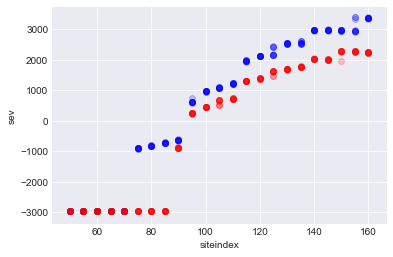

In [28]:
sns.regplot(data=short_sevs, x='siteindex', y='sev', fit_reg=False, scatter_kws={'alpha':0.2, 'color':'blue'});
sns.regplot(data=steep_sevs, x='siteindex', y='sev', fit_reg=False, scatter_kws={'alpha':0.2, 'color':'red'});

## Determine Biological Rotation Age

In [29]:
conn = psycopg2.connect("dbname='Rotations' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT summary.*, cases.mgmtid, CAST (cases.standid AS INT) AS siteindex
FROM summary, cases
WHERE summary.caseid = cases.caseid AND cases.mgmtid = 'LONG';
'''
# read the query into a pandas dataframe
long = pd.read_sql(SQL, conn)
conn.close()

In [30]:
long['siteclass'] = pd.cut(long.siteindex, bins=[0,75,95,115,135,161], 
                           labels=[5, 4, 3, 2, 1], right=False).astype('int')

long = long.sort_values(['caseid','age']).set_index(['caseid', 'age'])
long['atbdft'] = long.bdft - long.rbdft
long['attcuft'] = long.tcuft - long.rtcuft
# calculate the cumulative boardfoot volume of harvests for each simulation
long['cum_rbdft'] = long.groupby(level=0, as_index=False)['rbdft'].cumsum()
long['cum_rtcuft'] = long.groupby(level=0, as_index=False)['rtcuft'].cumsum()
# calculate the total standing plus removed volume
long['std_plus_rem_bdft'] = long.atbdft + long.cum_rbdft
long['std_plus_rem_tcuft'] = long.attcuft + long.cum_rtcuft
long = long.reset_index()

# smooth standing + removed volumes
smooth = long.groupby('caseid').rolling(window=5, on='age').mean().reset_index(drop=True)[['caseid', 'age', 'std_plus_rem_bdft', 'std_plus_rem_tcuft']]
long = long.merge(smooth, on=['caseid', 'age'], suffixes=('', '_smooth'))

# divide the total standing and removed volume by the year to get mean annual increment
long['mai_bdft'] = long.std_plus_rem_bdft_smooth / long.year
long['mai_tcuft'] = long.std_plus_rem_tcuft_smooth / long.year

# Calculate PAI
pai = long.set_index(['caseid', 'age'])[['std_plus_rem_bdft_smooth', 'std_plus_rem_tcuft_smooth']].diff().reset_index()
pai.loc[pai.age==0, ['std_plus_rem_bdft_smooth','std_plus_rem_tcuft_smooth']] = np.nan
pai[['std_plus_rem_bdft_smooth','std_plus_rem_tcuft_smooth']] = pai[['std_plus_rem_bdft_smooth','std_plus_rem_tcuft_smooth']]/5
long = long.merge(pai, on=['caseid', 'age'], suffixes=('', '_pai'))

In [31]:
long.columns

Index(['caseid', 'age', 'standid', 'year', 'tpa', 'ba', 'sdi', 'ccf', 'topht',
       'qmd', 'tcuft', 'mcuft', 'bdft', 'rtpa', 'rtcuft', 'rmcuft', 'rbdft',
       'atba', 'atsdi', 'atccf', 'attopht', 'atqmd', 'prdlen', 'acc', 'mort',
       'mai', 'fortyp', 'sizecls', 'stkcls', 'mgmtid', 'siteindex',
       'siteclass', 'atbdft', 'attcuft', 'cum_rbdft', 'cum_rtcuft',
       'std_plus_rem_bdft', 'std_plus_rem_tcuft', 'std_plus_rem_bdft_smooth',
       'std_plus_rem_tcuft_smooth', 'mai_bdft', 'mai_tcuft',
       'std_plus_rem_bdft_smooth_pai', 'std_plus_rem_tcuft_smooth_pai'],
      dtype='object')

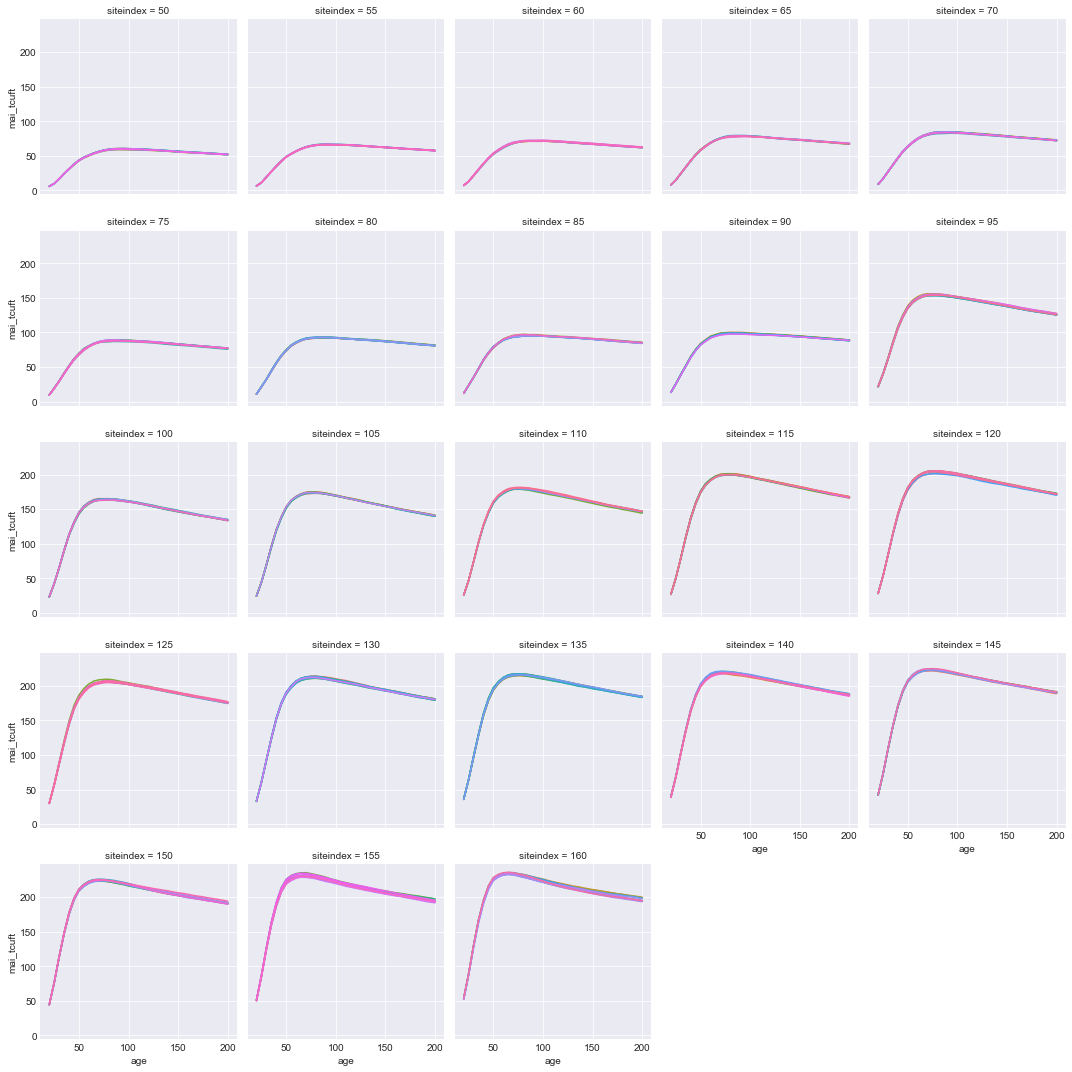

In [32]:
g = sns.FacetGrid(data=long, col='siteindex', col_wrap=5, hue='caseid')
g = g.map(plt.plot, 'age', 'mai_tcuft')

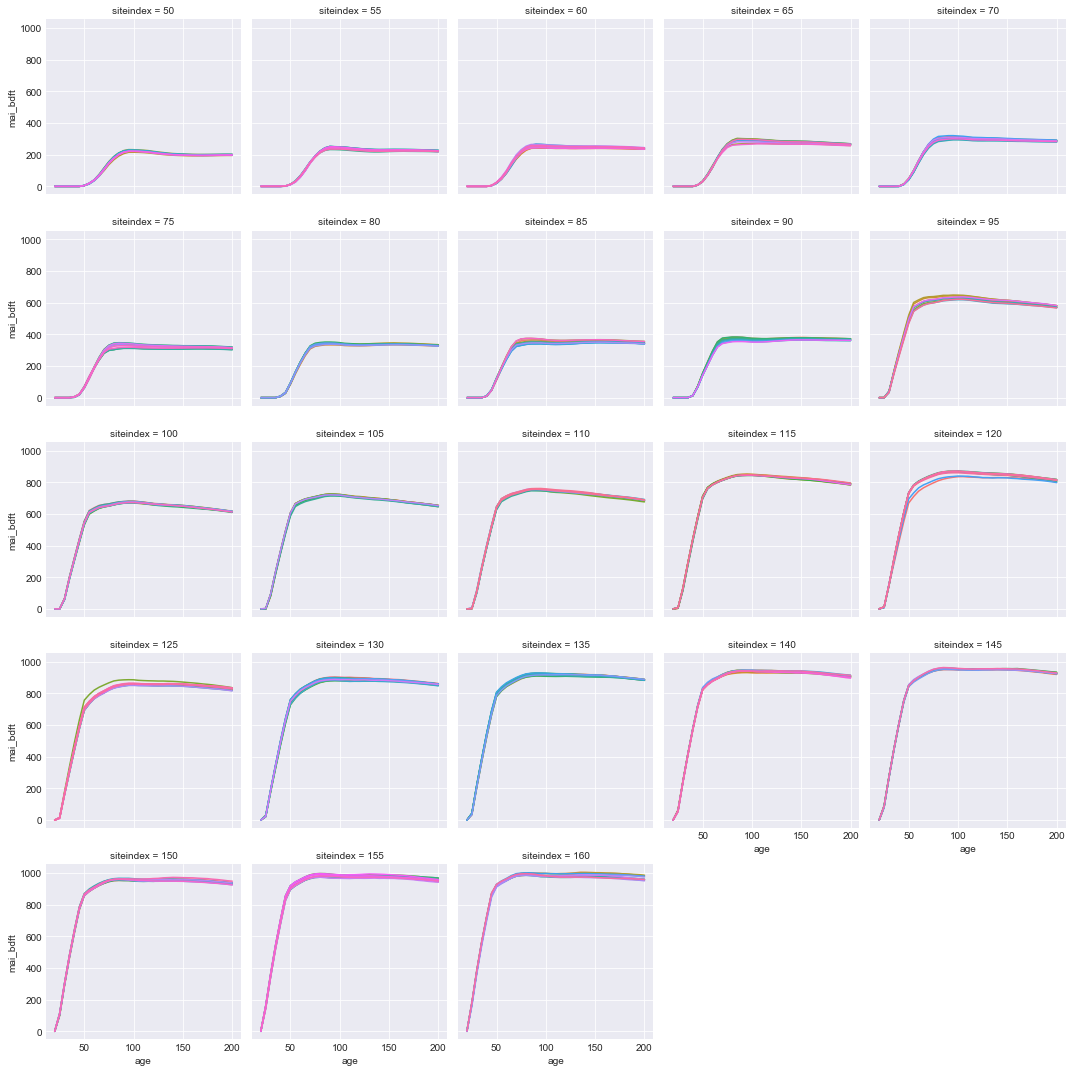

In [40]:
g = sns.FacetGrid(data=long, col='siteindex', col_wrap=5, hue='caseid')
g = g.map(plt.plot, 'age', 'mai_bdft')

In [52]:
conn = psycopg2.connect("dbname='Rotations' user='postgres' host='localhost'") # password in pgpass file
SQL = '''
SELECT summary.*, cases.mgmtid, CAST (cases.standid AS INT) AS siteindex
FROM summary, cases
WHERE summary.caseid = cases.caseid AND cases.mgmtid = 'GO';
'''
# read the query into a pandas dataframe
grow = pd.read_sql(SQL, conn)
conn.close()

In [53]:
# divide the total standing and removed volume by the year to get mean annual increment
grow = grow.sort_values(by=['caseid', 'year'])
grow['mai_bdft'] = grow.bdft / grow.year
grow['mai_tcuft'] = grow.tcuft / grow.year

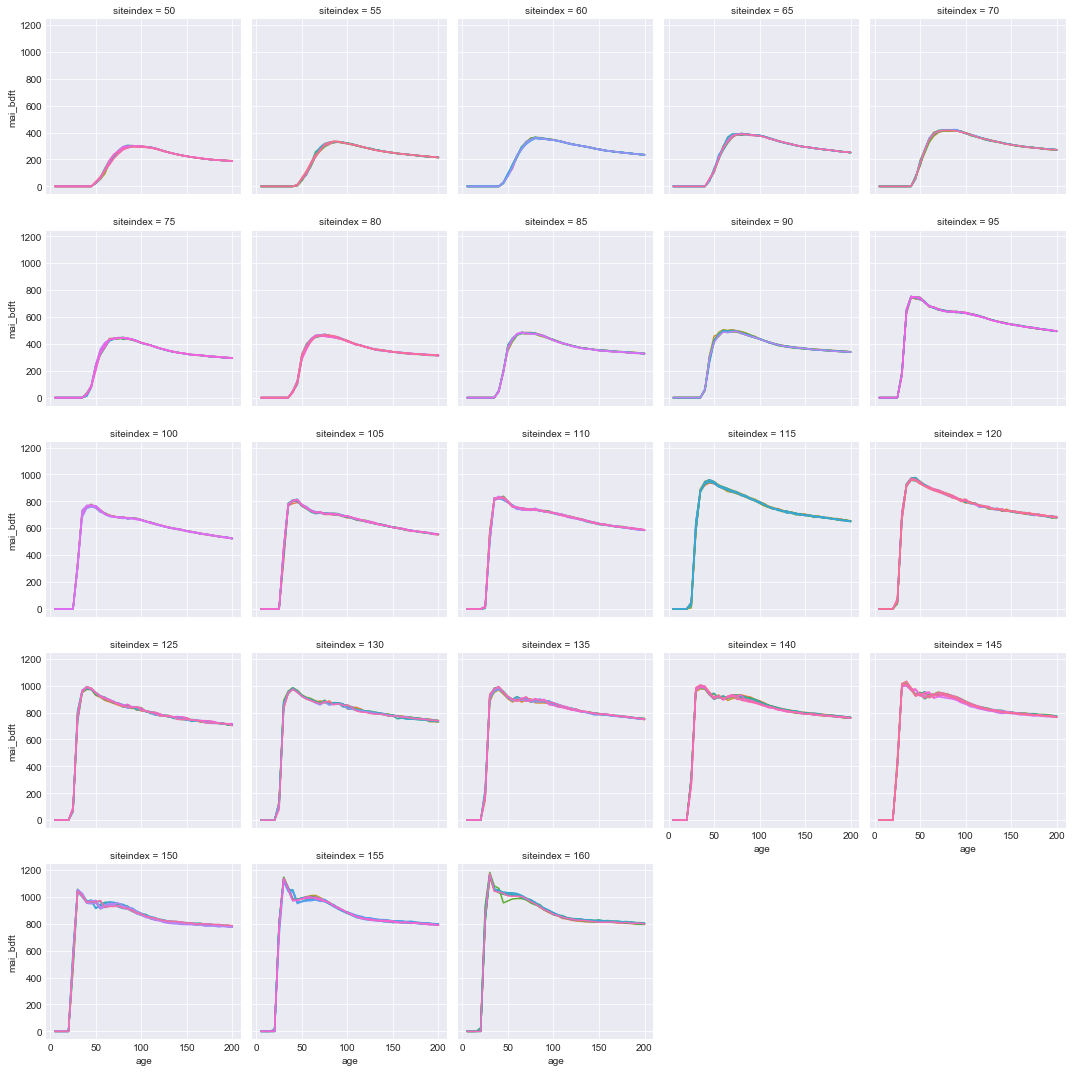

In [43]:
g = sns.FacetGrid(data=grow, col='siteindex', col_wrap=5, hue='caseid')
g = g.map(plt.plot, 'age', 'mai_bdft')

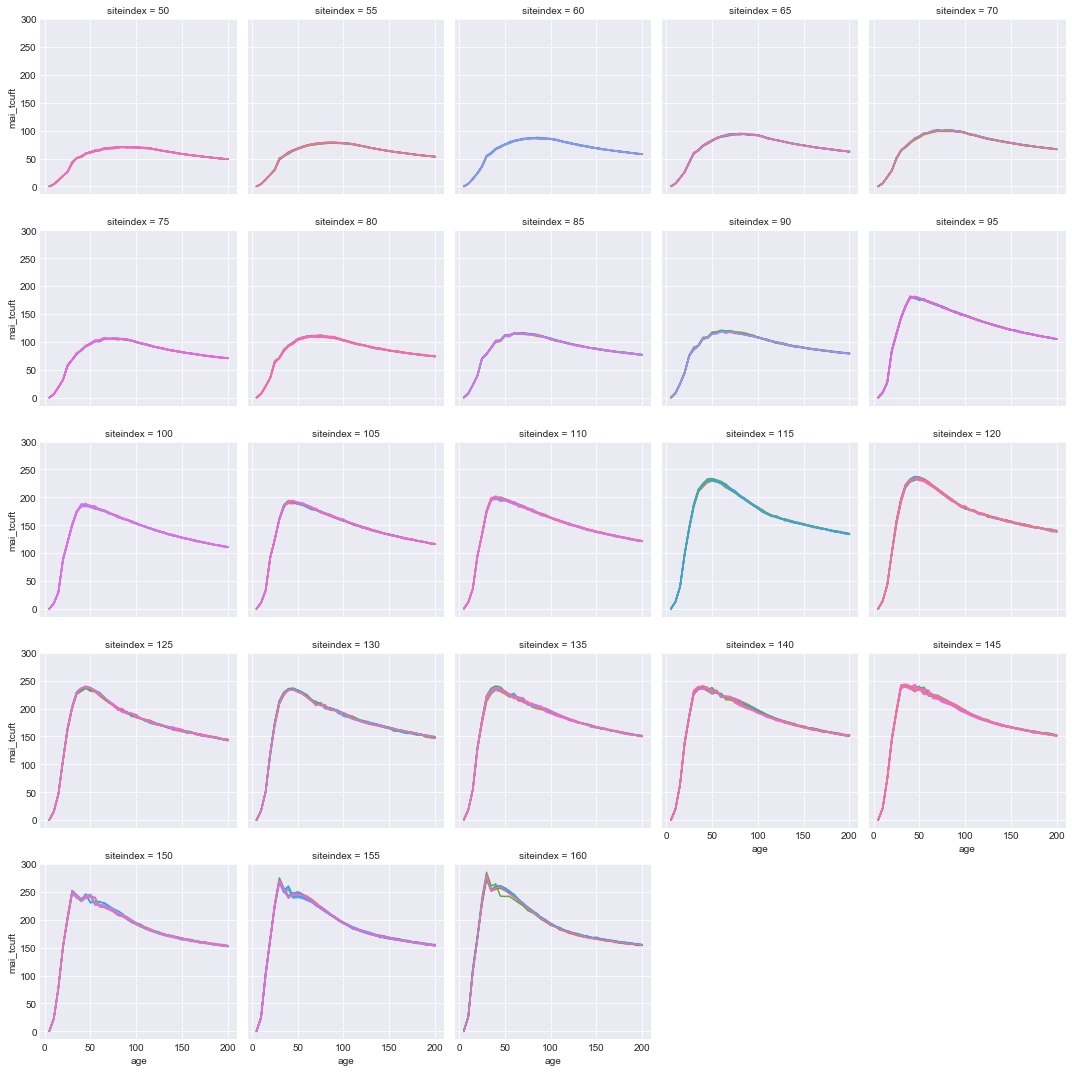

In [78]:
g = sns.FacetGrid(data=grow, col='siteindex', col_wrap=5, hue='caseid')
g = g.map(plt.plot, 'age', 'mai_tcuft')

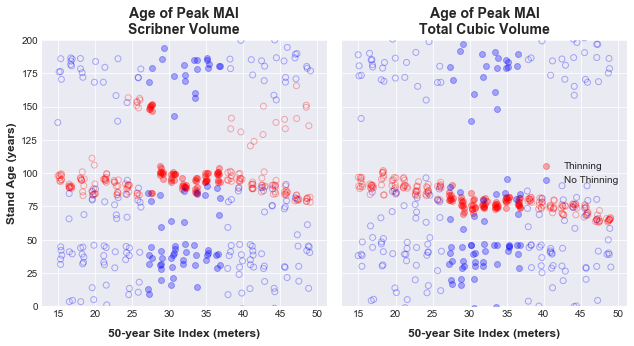

In [45]:
fig, axs = plt.subplots(1,2, figsize=(10,6), sharey=True)

# SIMULATIONS WITH THINNING
maxes = long[['year', 'siteindex']].iloc[long.groupby(['caseid', 'siteindex'])['mai_bdft'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3}, ax=axs[0])
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=axs[0])
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=axs[0])

maxes = long[['year', 'siteindex']].iloc[long.groupby(['caseid', 'siteindex'])['mai_tcuft'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3}, ax=axs[1], label='Thinning')
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=axs[1])
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=axs[1])

# SIMULATIONS WITHOUT THINNING
maxes = grow[['year', 'siteindex']].iloc[grow.groupby(['caseid', 'siteindex'])['mai_bdft'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3}, ax=axs[0])
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=axs[0])
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=axs[0])

maxes = grow[['year', 'siteindex']].iloc[grow.groupby(['caseid', 'siteindex'])['mai_tcuft'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3}, ax=axs[1], label='No Thinning')
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=axs[1])
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3, 'facecolors':'none'}, ax=axs[1])

axs[0].set_ylim(0,200)
#axs[1].set_ylim(20,100)
axs[0].set_title('''Age of Peak MAI
Scribner Volume''', fontsize=14, weight='bold')
axs[1].set_title('''Age of Peak MAI
Total Cubic Volume''', fontsize=14, weight='bold')
axs[0].set_xlabel("50-year Site Index (meters)", fontsize=12, weight='bold', labelpad=10)
axs[1].set_xlabel("50-year Site Index (meters)", fontsize=12, weight='bold', labelpad=10)
axs[0].set_ylabel("Stand Age (years)", fontsize=12, weight='bold')
axs[1].set_ylabel("")
axs[1].legend(loc="best")
plt.tight_layout(pad=5.0, w_pad=1.5)

xticks_m = np.arange(15,55,5)
axs[0].set_xticks(xticks_m/0.3048)
axs[0].set_xticklabels(xticks_m)
axs[1].set_xticks(xticks_m/0.3048)
axs[1].set_xticklabels(xticks_m);

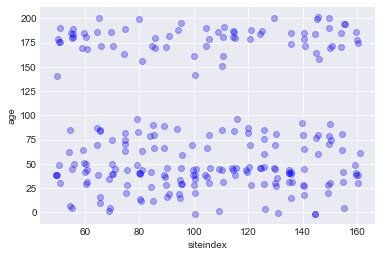

In [67]:
# SIMULATIONS WITHOUT THINNING
test = grow[['age', 'siteindex']].iloc[grow.groupby(['caseid', 'siteindex'])['mai_tcuft'].idxmax().values]

g = sns.regplot(x="siteindex", y="age", data=test, fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'blue', 'alpha':0.3})

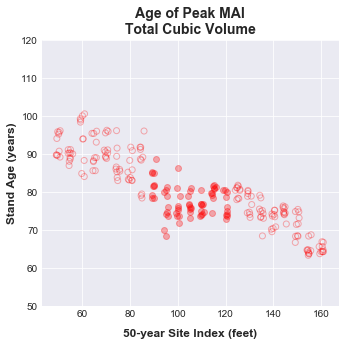

In [80]:
fig, axs = plt.subplots(1,1, figsize=(6,6), sharey=True)

# SIMULATIONS WITH THINNING
maxes = long[['year', 'siteindex']].iloc[long.groupby(['caseid', 'siteindex'])['mai_tcuft'].idxmax()]

g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex.between(90,120)], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3}, ax=axs)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex < 90], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=axs)
g = sns.regplot(x="siteindex", y="year", data=maxes.loc[maxes.siteindex > 120], fit_reg=False, 
               x_jitter=1, y_jitter=2, scatter_kws={'color':'red', 'alpha':0.3, 'facecolors':'none'}, ax=axs)

axs.set_ylim(50,120)
#axs.set_xlim(88,122)
axs.set_title('''Age of Peak MAI
Total Cubic Volume''', fontsize=14, weight='bold')
axs.set_xlabel("50-year Site Index (feet)", fontsize=12, weight='bold', labelpad=10)
axs.set_ylabel("Stand Age (years)", fontsize=12, weight='bold')
plt.tight_layout(pad=5.0, w_pad=1.5);